<a href="https://colab.research.google.com/github/GLuarte/Data-Science-1/blob/main/Idealista_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression project
### Gonzalo Luart - Javier Pulido

In [ ]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

First of all, the original dataset has to be imported

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/Barcelona_Idealista.csv",index_col=0)

Then two identified outliers gets dropped because they will unbalance the sample and because of that the model

In [ ]:
df=df.drop(1089)
df=df.drop(214)
df.reset_index(drop=True, inplace=True)

In [ ]:
df['prices'].sort_values()

2995      49000
2266      69000
3124      76000
2697      79000
3105      80000
         ...   
968     5800000
482     6250000
1975    6500000
1217    6500000
1997    6900000
Name: prices, Length: 3263, dtype: int64

Then to know which features are more correlated to the price, a correlation matrix and then a heatmap gets build

In [ ]:
corr_matrix = df.corr()[['prices']].sort_values('prices')

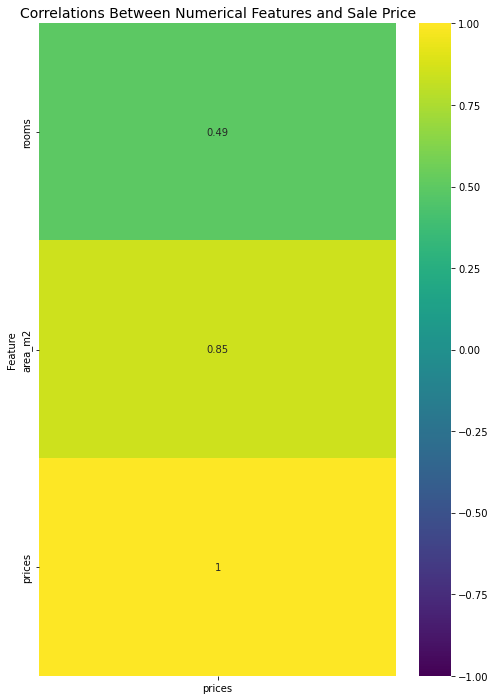

In [ ]:
plt.figure(figsize=(8, 12))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Sale Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

Then it is important knowing the prices stadistic distribution

In [ ]:
def create_hist(feature, num_bins, title, x_label, y_label, color='mediumseagreen', edgecolor='black', plot_size = (10,6)):
    plt.figure(figsize=plot_size)
    feature.hist(bins = num_bins, color=color, edgecolor=edgecolor, grid = False)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

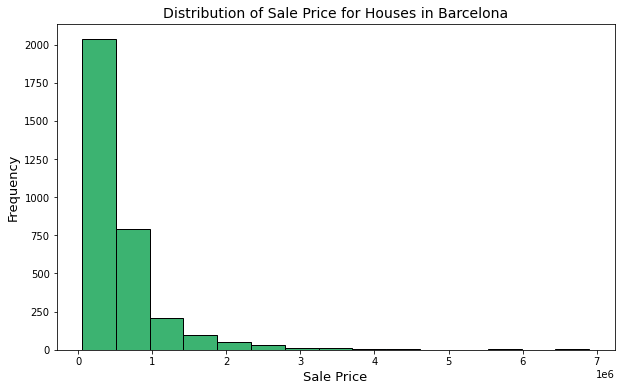

In [ ]:
create_hist(df['prices'], 
            num_bins = 15, 
            title = 'Distribution of Sale Price for Houses in Barcelona',
           x_label = 'Sale Price',
           y_label = 'Frequency')

As you might find, the prices does not distributes normally, and any normalization will make the original value recover really hard.
But making a log(prices) function makes this column more normally distributed

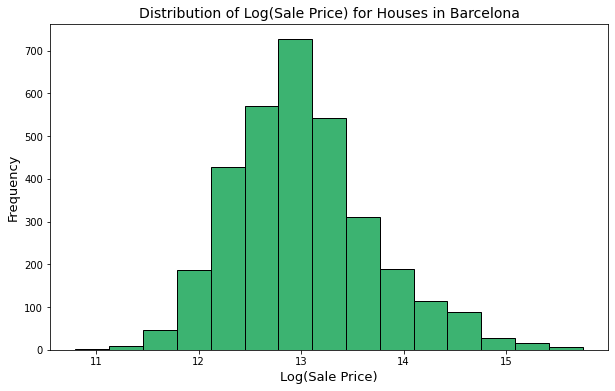

In [ ]:
create_hist(np.log(df['prices']), 
            num_bins = 15, 
            title = 'Distribution of Log(Sale Price) for Houses in Barcelona',
           x_label = 'Log(Sale Price)',
           y_label = 'Frequency')

In [ ]:
df['log_prices']=np.log(df['prices'])

In [ ]:
def create_bar(df, x_col, y_col, title, x_label, y_label, hue=None, color = 'mediumseagreen', plot_size = (10,6), lw = 1.5):
    plt.figure(figsize=plot_size)
    ax = sns.barplot(x = x_col, y = y_col, data = df, hue = hue, color = color, linewidth = lw, edgecolor = 'black')
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.xticks(rotation='vertical')
    plt.tight_layout;

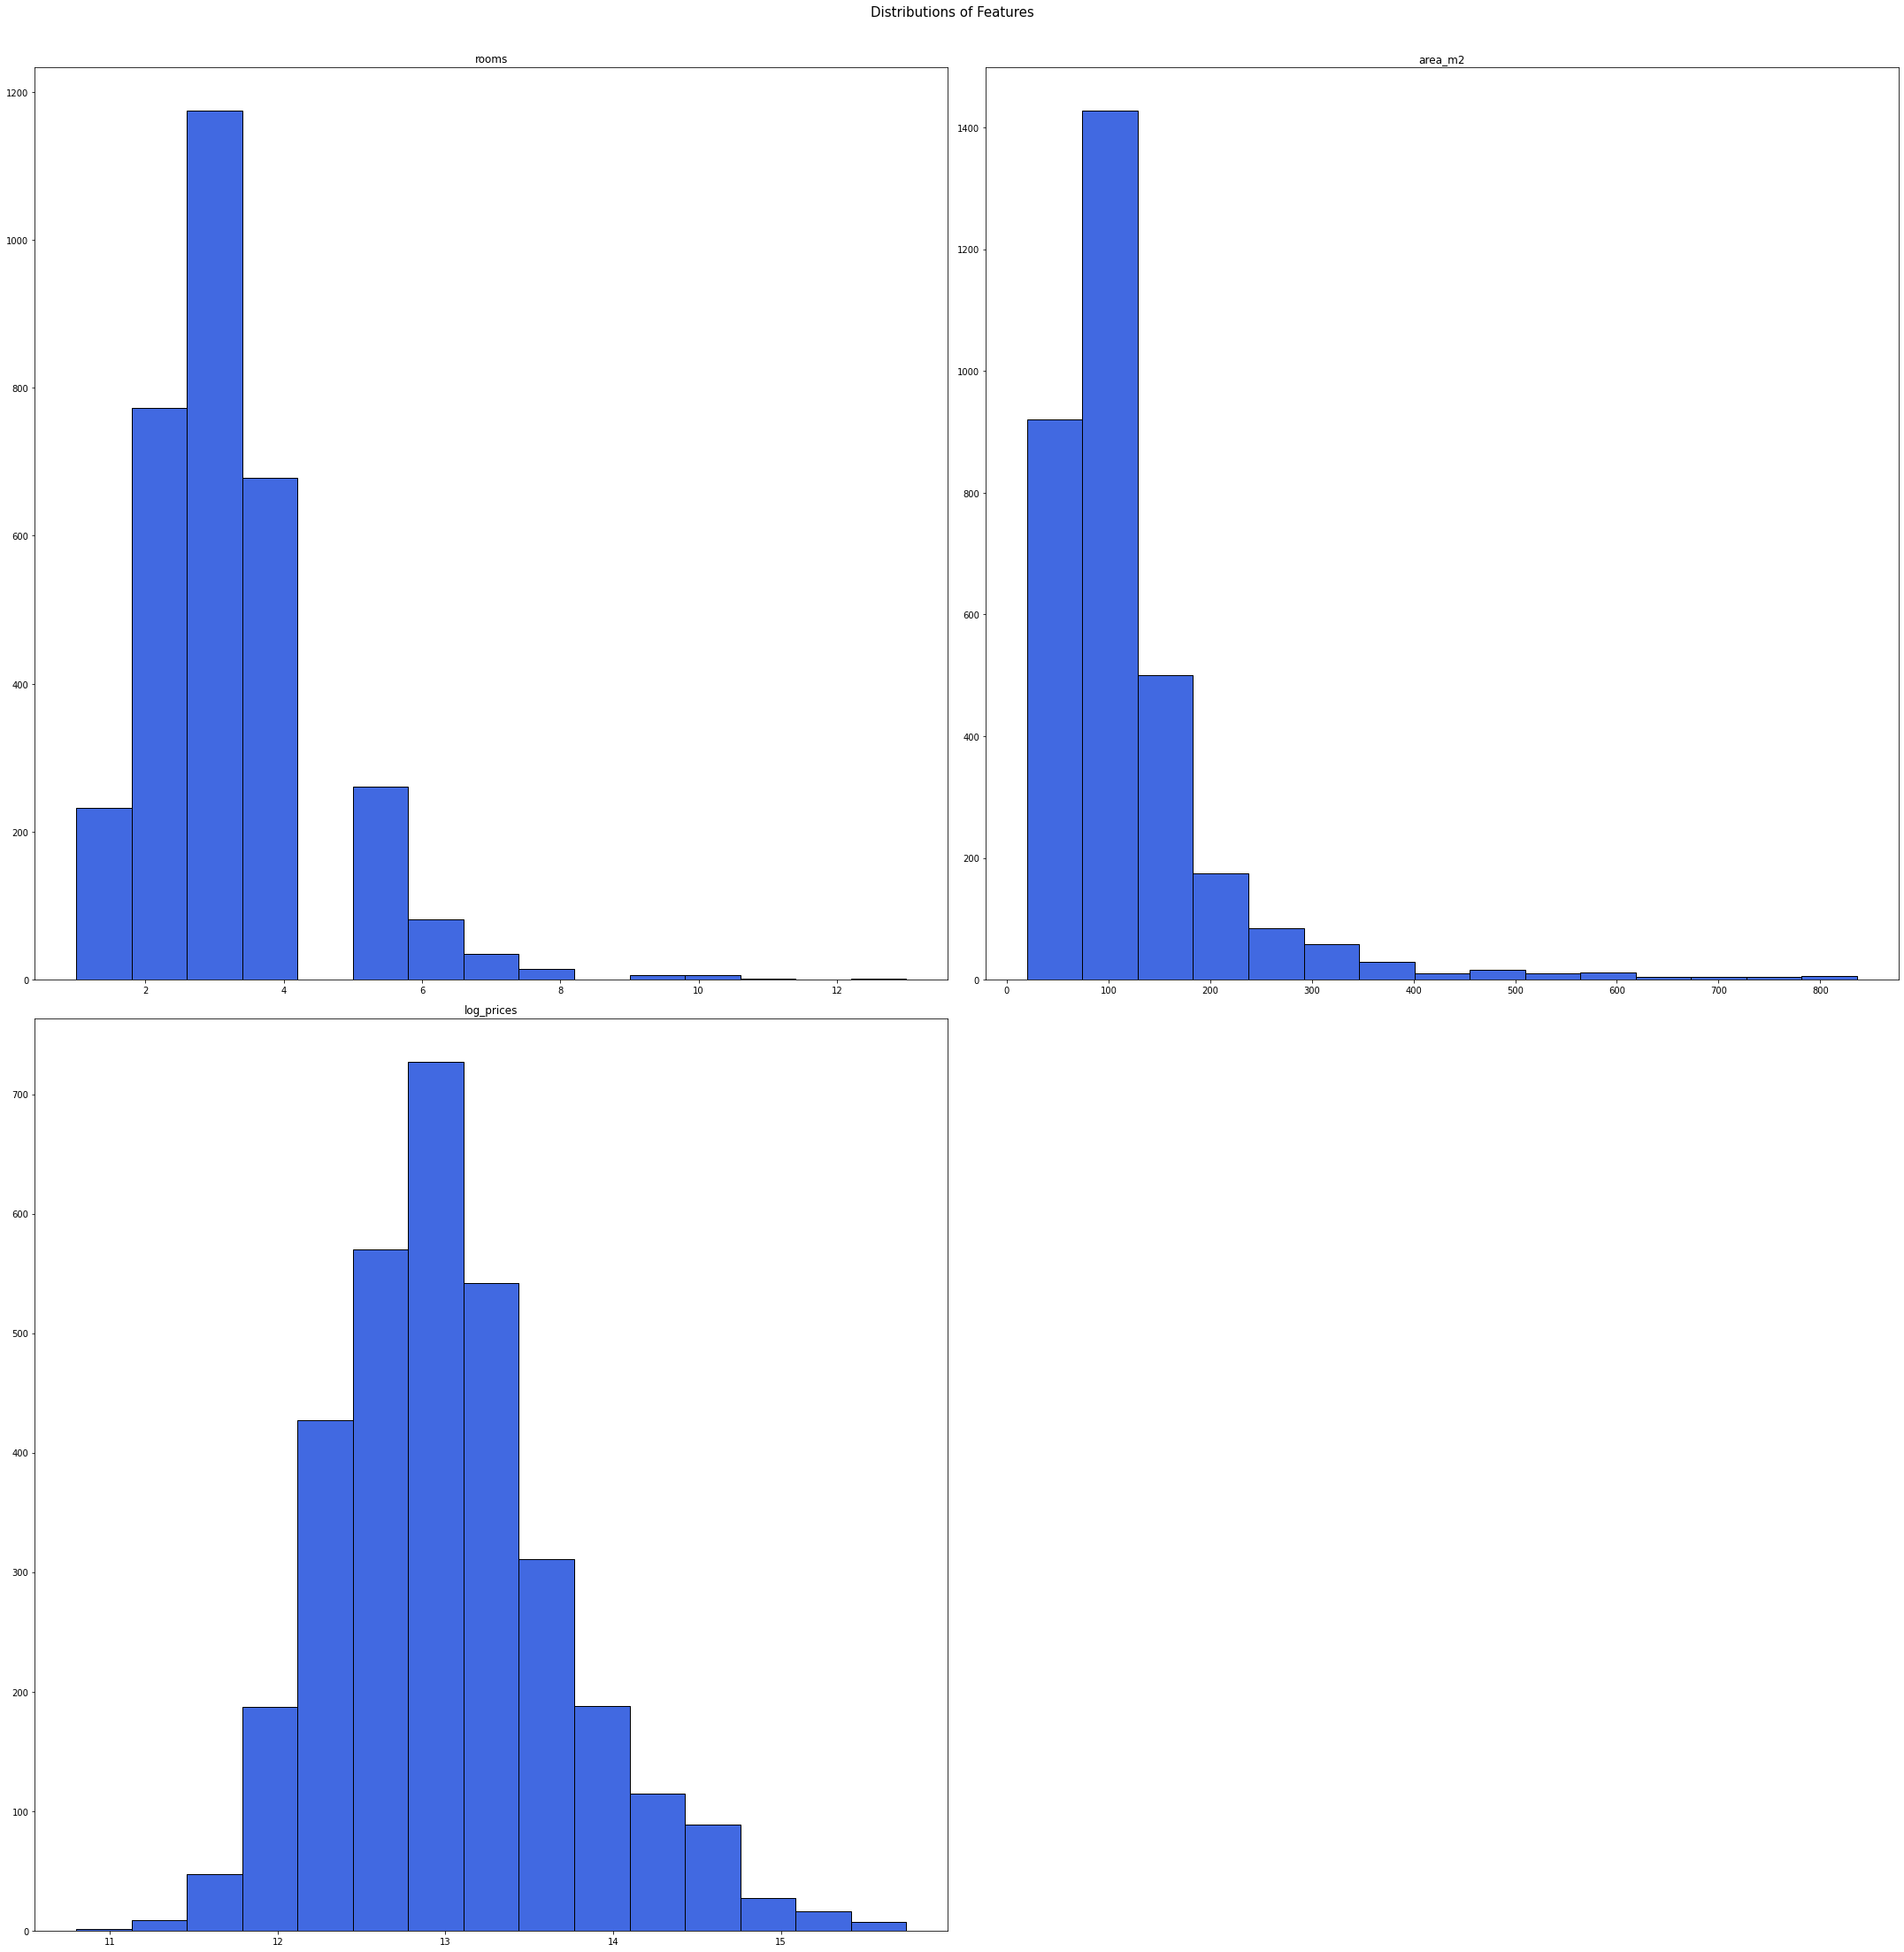

In [ ]:
df.drop(columns='prices').hist(figsize=(30, 30), bins = 15, edgecolor = 'black', grid = False, color = 'royalblue')
plt.suptitle('Distributions of Features', x = 0.5, y = 1.02, size = 15)
plt.tight_layout();

Categorical features correlation

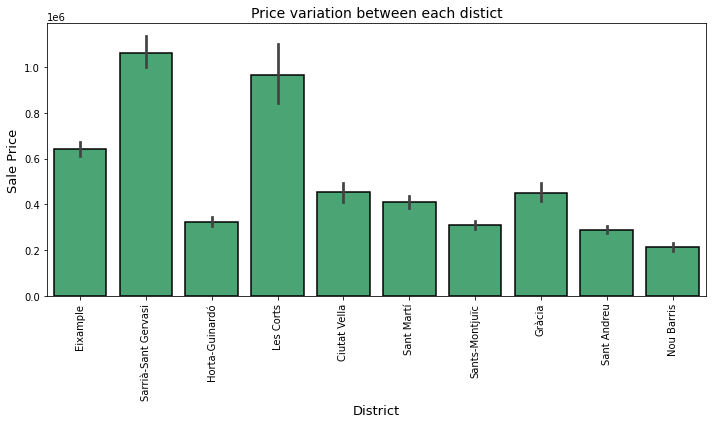

In [ ]:
create_bar(df, 
          'district', 
          'prices', 
          title='Price variation between each distict', 
          x_label = 'District', 
          y_label = 'Sale Price',
       )
plt.tight_layout()

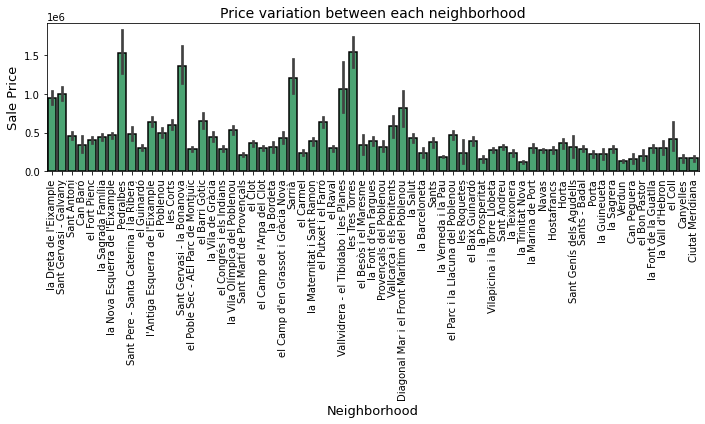

In [ ]:
create_bar(df, 
          'neighborhood', 
          'prices', 
          title='Price variation between each neighborhood', 
          x_label = 'Neighborhood', 
          y_label = 'Sale Price',
       )
plt.tight_layout()

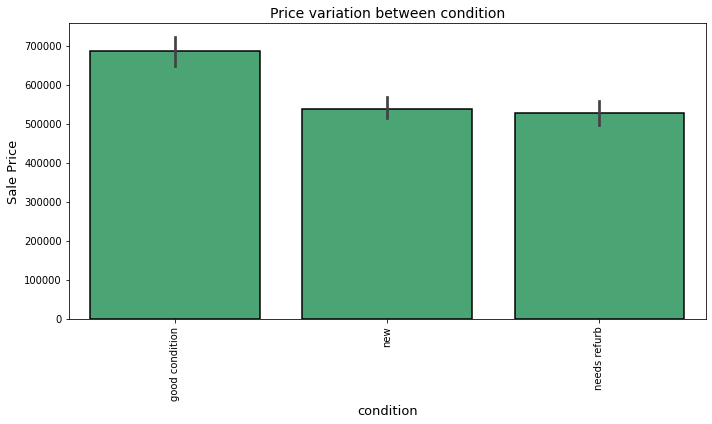

In [ ]:
create_bar(df, 
          'condition', 
          'prices', 
          title='Price variation between condition', 
          x_label = 'condition', 
          y_label = 'Sale Price',
       )
plt.tight_layout()

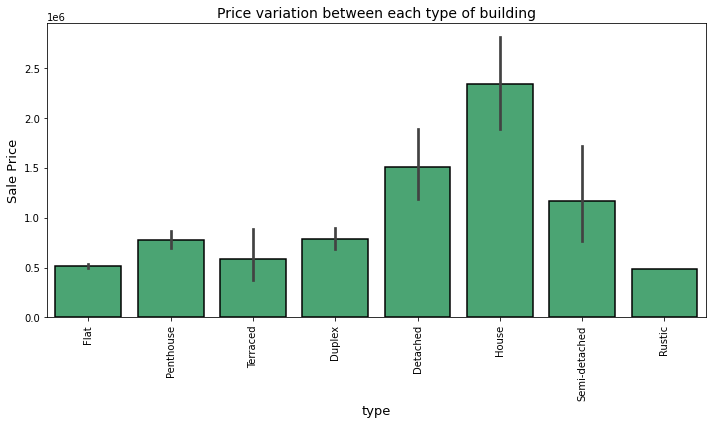

In [ ]:
create_bar(df, 
          'type', 
          'prices', 
          title='Price variation between each type of building', 
          x_label = 'type', 
          y_label = 'Sale Price',
       )
plt.tight_layout()

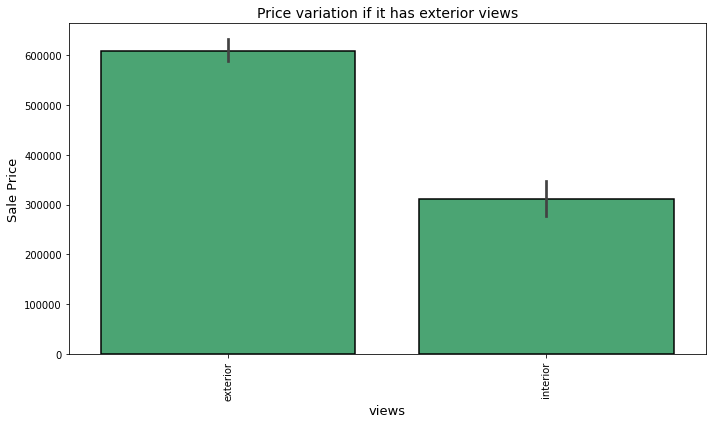

In [ ]:
create_bar(df, 
          'views', 
          'prices', 
          title='Price variation if it has exterior views', 
          x_label = 'views', 
          y_label = 'Sale Price',
       )
plt.tight_layout()

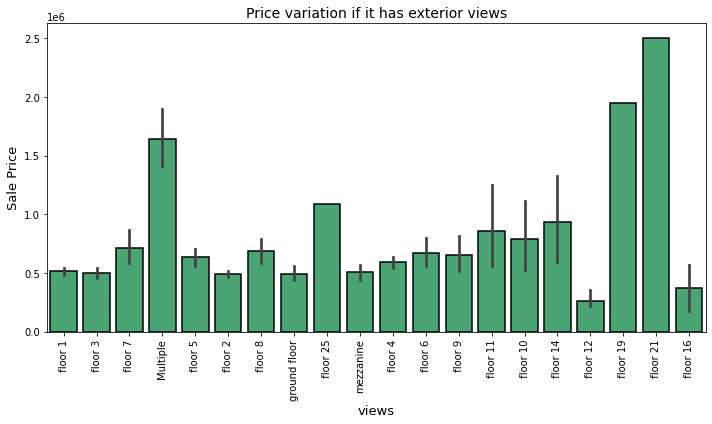

In [ ]:
create_bar(df, 
          'floor', 
          'prices', 
          title='Price variation if it has exterior views', 
          x_label = 'views', 
          y_label = 'Sale Price',
       )
plt.tight_layout()

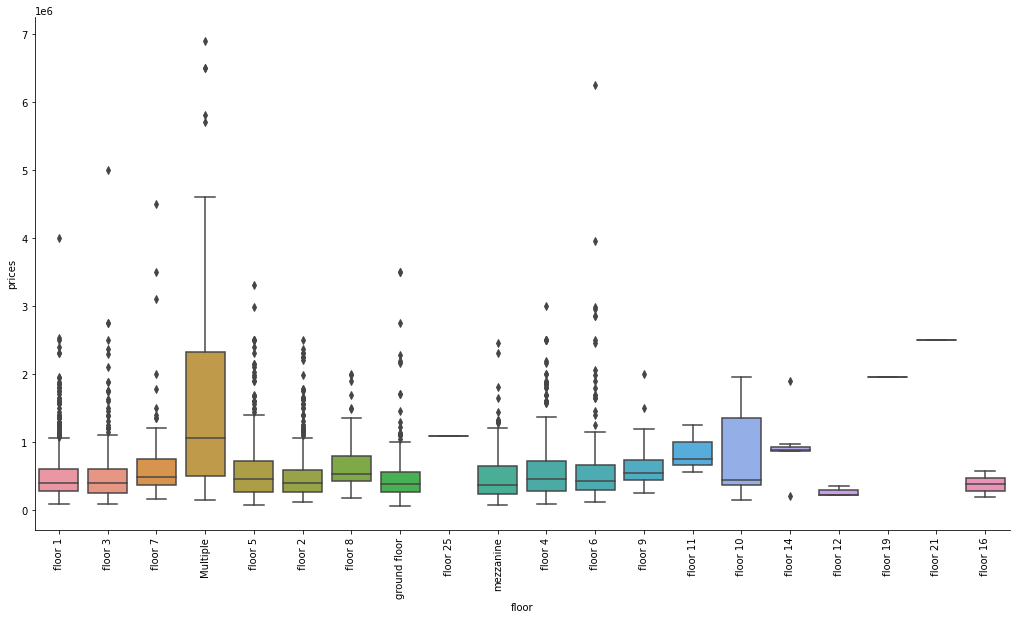

In [ ]:
g=sns.catplot(x="floor", y="prices", kind="box", data=df,height=8, aspect=16/9)
g.set_xticklabels(rotation=90)

Condition feature gets converted to numerical 

In [ ]:
condition={'good condition':2,'new':3,'needs refurb':1}
df.condition = [condition[item] for item in df.condition]

Floor values also get replaced for more simple values considering the boxplot showed above

In [ ]:
floor={}
for i in range(1,26):
  if i < 5:
    floor[' floor '+str(i)]=1
  elif i >= 5 and i<19:
    floor[' floor '+str(i)]=2
  elif i>=19:
    floor[' floor '+str(i)]=3

floor['mezzanine']=1
floor['ground floor']=1
floor['Multiple']=3

In [ ]:
df.floor = [floor[item] for item in df.floor]

In [ ]:
df['floor'].value_counts()

1    2488
2     628
3     147
Name: floor, dtype: int64

In [ ]:
df['district'].value_counts()

Eixample               787
Sarrià-Sant Gervasi    519
Sant Martí             420
Ciutat Vella           340
Sants-Montjuïc         271
Les Corts              256
Horta-Guinardó         206
Gràcia                 205
Sant Andreu            155
Nou Barris             104
Name: district, dtype: int64

The district column gets dropped, because the neighborhood column will be keeped and having both columns is redundant, since having the neighborhood is enough to know the district

In [ ]:
# one_hot=pd.get_dummies(df['district'])
df=df.drop('district', axis=1)
# df=df.join(one_hot)

Also the rest of categorical columns get one hot encoded

In [ ]:
one_hot=pd.get_dummies(df['neighborhood'])
df=df.drop('neighborhood', axis=1)
df=df.join(one_hot)

In [ ]:
one_hot=pd.get_dummies(df['type'])
df=df.drop('type', axis=1)
df=df.join(one_hot)

In [ ]:
lift_ones=pd.get_dummies(df['lift'])
#lift_ones
df=pd.concat((df,lift_ones['Yes']),axis=1)
df=df.drop('lift', axis=1)
df=df.rename(columns={'Yes':'Lift'})
# df=df.drop('type', axis=1)
# df=df.join(one_hot)

In [ ]:
views_ones=pd.get_dummies(df['views'])
#lift_ones
df=pd.concat((df,views_ones['exterior']),axis=1)
df=df.drop('views', axis=1)
df=df.rename(columns={'exterior':'views'})
# df=df.drop('type', axis=1)
# df=df.join(one_hot)

In [ ]:
df=df.drop('city', axis=1)
#df=df.drop('neighborhood', axis=1)

In [ ]:
abs(df.corr()["prices"]).sort_values()

les Corts                        0.000655
Terraced                         0.000869
Vallcarca i els Penitents        0.002032
Rustic                           0.003042
la Vila Olímpica del Poblenou    0.008722
                                   ...   
House                            0.374900
rooms                            0.493378
area_m2                          0.849368
log_prices                       0.859764
prices                           1.000000
Name: prices, Length: 81, dtype: float64

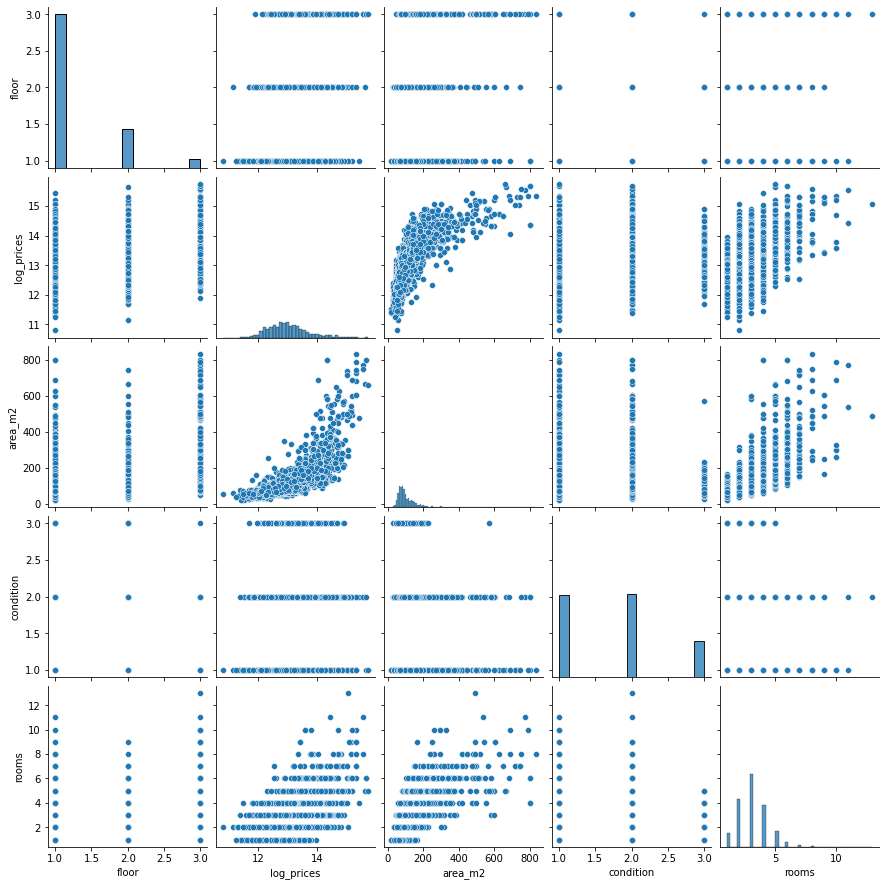

In [ ]:
g=sns.pairplot(df[['floor','log_prices','area_m2','condition','rooms']],diag_kind='hist')

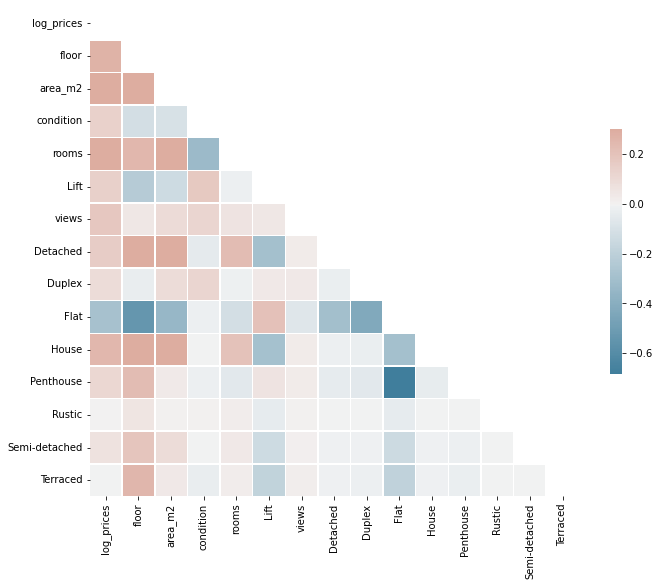

In [ ]:
corr = df[['log_prices','floor','area_m2','condition','rooms','Lift','views','Detached','Duplex','Flat','House','Penthouse','Rustic','Semi-detached','Terraced']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df.to_csv('/content/drive/MyDrive/Data/IdealistaPrep.csv')